In [156]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/srbol/Downloads/survey lung cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

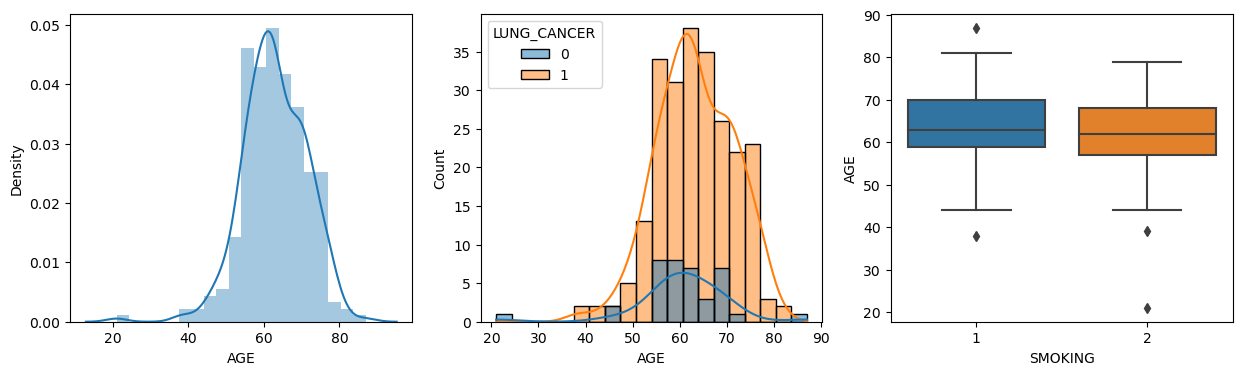

In [191]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['SMOKING'],y=df['AGE'],ax=ax[2])

plt.show()

# Pre Processing and Feature Engineering

In [157]:
print(df.shape)
print(df.info())

(309, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER  

In [158]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print

import warnings
warnings.filterwarnings("ignore")

33


In [159]:
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [160]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [161]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [162]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


# Random Forest

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score, mean_absolute_error, mean_squared_error

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
conf_matrix=confusion_matrix(y_test,rcv.predict(X_test))
accuracy = accuracy_score(y_test, y_pred_rcv)

print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')
print(f'Accuracy L : {accuracy: .2f}\n')



Confusion Matrix:
 [[60  0]
 [ 6 53]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameter: {'n_estimators': 50}

Accuracy L :  0.95



# KNN

Looking for best K value

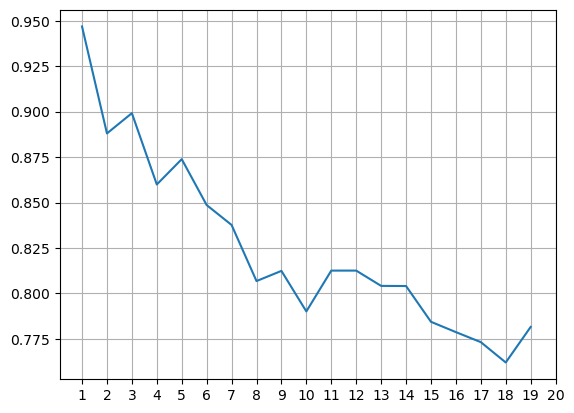

In [164]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


knn_scores = []
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

In [165]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
conf_matrix=confusion_matrix(y_test,knn.predict(X_test))
accuracy = accuracy_score(y_test, knn.predict(X_test))

print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test,knn.predict(X_test)))
print(f'Accuracy L : {accuracy: .2f}\n')


Confusion Matrix:
 [[60  0]
 [11 48]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       1.00      0.81      0.90        59

    accuracy                           0.91       119
   macro avg       0.92      0.91      0.91       119
weighted avg       0.92      0.91      0.91       119

Accuracy L :  0.91



# Logistic Regression

In [166]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
conf_matrix=confusion_matrix(y_test,log.predict(X_test))
accuracy = accuracy_score(y_test, y_pred_log)

print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test,y_pred_log))
print(f'Accuracy L : {accuracy: .2f}\n')

Confusion Matrix:
 [[55  5]
 [ 9 50]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.91      0.85      0.88        59

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119

Accuracy L :  0.88



# Decision Tree 

In [167]:
clf = DecisionTreeClassifier(random_state = 10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test,clf.predict(X_test))

print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test,y_pred))
print(f'Accuracy L : {accuracy: .2f}\n')



Confusion Matrix:
 [[60  0]
 [ 7 52]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119

Accuracy L :  0.94



# SVM 

In [168]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
accuracy = accuracy_score(y_test, y_pred_svc)
print(classification_report(y_test,y_pred_svc))

print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')
print(f'Accuracy L : {accuracy: .2f}\n')


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 1, 'C': 100}

Accuracy L :  0.99



# Evaluation 


# RANDOM FOREST

Confusion Matrix:
 [[60  0]
 [ 6 53]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameter: {'n_estimators': 50}

Accuracy L :  0.95

The specified hyperparameter settings demonstrates good performance in terms of accuracy, precision, recall, and f1. Overall accuracy of the model is 95%, and the  Recall was able to find all positive samples. it's perfect for class 0 and 90% for class 1


# KNN

Confusion Matrix:
 [[60  0]
 [11 48]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       1.00      0.81      0.90        59

    accuracy                           0.91       119
   macro avg       0.92      0.91      0.91       119
weighted avg       0.92      0.91      0.91       119

Accuracy L :  0.91

The model demonstrates good overall performance, with high precision and recall for class 0 and perfect precision but slightly lower recall for class 1. The F1-scores are also relatively high. The accuracy of 91% suggests that the model is effective in making correct predictions on the given dataset. 


# Logistic Regression

Confusion Matrix:
 [[55  5]
 [ 9 50]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.91      0.85      0.88        59

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119

Accuracy L :  0.88

Overall the model shows a balanced performance with good precision and recall values for both classes. The F1-score are also high.


# Decision Tree

Confusion Matrix:
 [[60  0]
 [ 7 52]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119

Accuracy L :  0.94

This indicates a well-performing model, it may be considered suitable for deployment.


# SVM

precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119

The Support Vector Classifier with the specified hyperparameters ({'gamma': 1, 'C': 100}) has achieved outstanding performance on the dataset, with high precision, recall, and F1-scores for both classes. The accuracy of 99% indicates that the model is very effective and may be suitable for deployment, though the specific use case and requirements should be considered. The hyperparameters provided (C and gamma) are crucial for the SVC model's performance and should be documented for reproducibility.



# Conclusion

1. Random Forest :  even with only 95% accuracy, but it has a very high precision, recall, and F1-SCORES for both classes. It's the most balanced.
2. Decision Tree : with accuracya around 94%, decision  tree can handle various machine learnig tasks due to several advantages. Decision tree versatile for various dataset withoput the need for extensive pre processing. But, decision  tree also have some limitations, such as being proone to overfitting on noisy data.
3. SVM : it has a perfect result with overall accuracy 99%, and even an excellent precision. Unfortunately SVM can be computationally intensive, especially with large datasets. Compared to Random forest and decision tree, SVM might not be the best  choice due to its intensity

If accuracy is your primary concern and computational resources are not a limiting factor, the Support Vector Classifier (SVC) with hyperparameters {'gamma': 1, 'C': 100} seems to be performing exceptionally well with an accuracy of 99%. If you prioritize a balance between accuracy and interpretability, Random Forest with an accuracy of 95% and {'n_estimators': 50} as the best parameter could be a good choice. If you have constraints on computational resources and still want a good balance between accuracy and performance, decision tree with an accuracy of 94% might be considered.